# 한글 워드 클라우드 -여친선물

In [15]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'


한글 텍스트 처리

In [2]:
text = '열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요.'

In [3]:
#한글은 토큰화 전에 형태소 분석을 먼저 해야함
from konlpy.tag import Okt, Kkma, Komoran

okt=Okt()   #Open korean text
kkma=Kkma() #꼬꼬마
kr = Komoran() #코모란

- 형태소 분석기

In [4]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요', '.']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요', '.']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요', '.']


- 품사 테깅(Part-of-speach tagging) =pos

In [5]:
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb'), ('.', 'Punctuation')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VXV'), ('세요', 'EFN'), ('.', 'SF')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EF'), ('.', 'SF')]


- 명사추출 

In [6]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


### 2.데이터 파일 읽고 전처리

In [9]:
with open('data/new_gift.txt') as file:
  text = file.read()

In [10]:
# 명사 추출
tokens = okt.nouns(text)
tokens[:10]


['혹시', '여친', '생리통', '여친', '선물', '복부', '열기', '저', '생리통', '이번']

In [16]:
#영문자, 숫자, 부호 제거, 한글과 공백만 남김
import re

tokens = [re.sub('[^가-힣 ]','',token)for token in tokens]

In [18]:
from nltk import punkt

- 다음의 두 과증을 반복해서 불용어를 정리

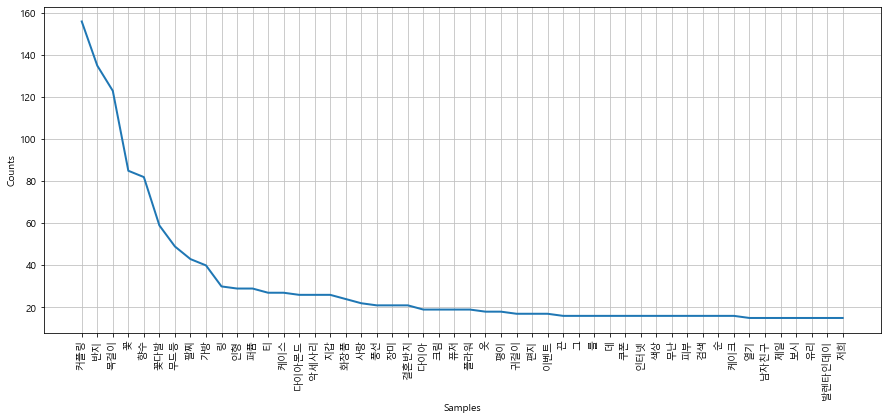

In [21]:
gift = nltk.Text(tokens, name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [20]:
stoptext='''
선물 추천 후기 수 제품 여자친구 확인 가격 것 저 수수료 스 활동 파트너 여자 이 준 가능 계 브랜드 상품 여친 제공 떄 생일 제작 사진 커플 배송 
구매 생각 정액 채택 링크 답변 한번 의미 더 여성 참고 분 요 네이버 디자인 가성 거 인기 도움 비 향 등 마감 가지 친구 고급 하트 용 통해 
주문 쿠팡 사용 위 기념일 정말 핸드 변경 남녀 안쪽 중 부담 남자 질문 세트 각인 판매 기부 고민 가요 팅
계 때 개 팅 블로그 아래 끗 정도 사이트 요즘 하나 처리 감동 마음 일환 이니셜 그냥 날 드라마 협찬 무광후원 가장 포스팅 맞춤 유광 조금 할인 은 직접 보통 사람 시
제 팅 곳 무광 후원 도 구성 스토어 너 구경 이면 인테리어 블라썸 심플 미만 준비 해 사이즈 자 로티 다른 비누 전 아주 포장 디 여기 몇개 복부 듯 옵션 무료 순위
바로가기 로 향기 걸 지금 하루 뽀뚜빠뚜 취향 느낌 아이템 종류 감성 때문 오늘
'''
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]
tokens[:10]

['혹시', '생리통', '열기', '생리통', '이번', '남자친구', '열기', '뭔가', '절', '배']

### 3.워드 클라우드 그리기

In [22]:
from wordcloud import WordCloud
from PIL import Image

In [23]:
data = gift.vocab().most_common(300)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=font_path, relative_scaling=0.2,
               background_color='white'
               ).generate_from_frequencies(dict(data))

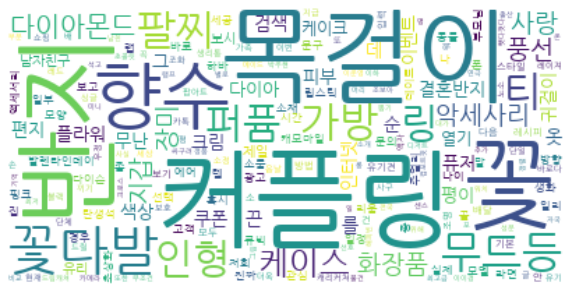

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트그림에 표시

In [27]:
mask = np.array(Image.open('heart.jpg'))

In [28]:
from matplotlib import image
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [29]:
wc = WordCloud(font_path=font_path, relative_scaling=0.2,
               background_color='white',mask=mask,
               min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

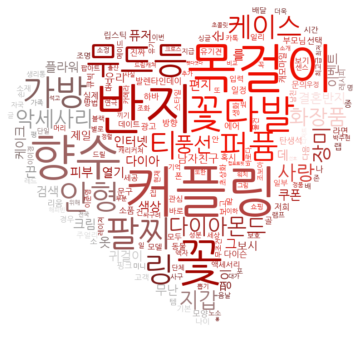

In [30]:
plt.figure(figsize=(10,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()